# Clustering jerarquico y dendrogramas

* X dataset (array de n x m) de puntos a clusterizar
* n numero de datos
* m numero de rasgos
* Z array de enlace del cluster con la información de las uniones
* k número de clusters

In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

(150, 2)


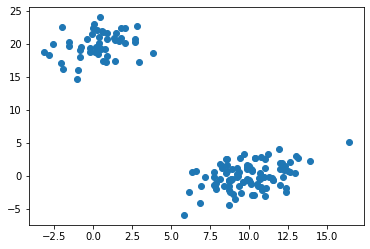

In [5]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0], [[3,1], [1,4]], size = [100,]) #Creamos dataset con datos aleatorios
b = np.random.multivariate_normal([0,20], [[3,1], [1,4]], size = [50,]) #Creamos dataset con datos aleatorios
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
a

array([[ 9.21188389, -0.15188589],
       [ 8.88937431, -0.33937464],
       [10.76840064,  2.95244645],
       [ 8.24213268,  1.29094802],
       [ 5.7967009 , -5.83776714],
       [ 6.3499309 ,  0.63959515],
       [ 8.1057123 , -0.45887277],
       [ 8.72084884, -4.40444487],
       [ 8.83500513, -0.3916611 ],
       [10.4006121 ,  2.71240817],
       [11.95503402,  1.98602715],
       [ 8.5014185 ,  0.50349583],
       [ 9.2335919 ,  1.30693205],
       [12.27768001,  1.62763958],
       [10.95901841, -0.12752032],
       [ 8.72437412, -0.73101911],
       [ 9.64949127,  3.4198941 ],
       [11.49912084, -0.55113172],
       [11.48256428, -0.28623494],
       [ 8.58740424,  1.66814229],
       [11.95570427, -1.27350693],
       [ 9.85622312,  1.08989137],
       [10.11831014,  1.08458295],
       [ 7.76042253,  0.63746835],
       [10.99794159, -2.93746848],
       [ 6.90850201, -1.44867941],
       [ 7.85787065, -0.99148119],
       [ 6.12508463, -2.44306477],
       [10.61143795,

In [6]:
Z = linkage(X, "ward")
Z

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [7]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [9]:
c, coph_dist = cophenet (Z, pdist(X))
c

0.9800148387574268

In [10]:
Z [152 - len(X)] # cluster 152

array([33.        , 68.        ,  0.07106779,  2.        ])

In [11]:
X [[33, 62, 68]]

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

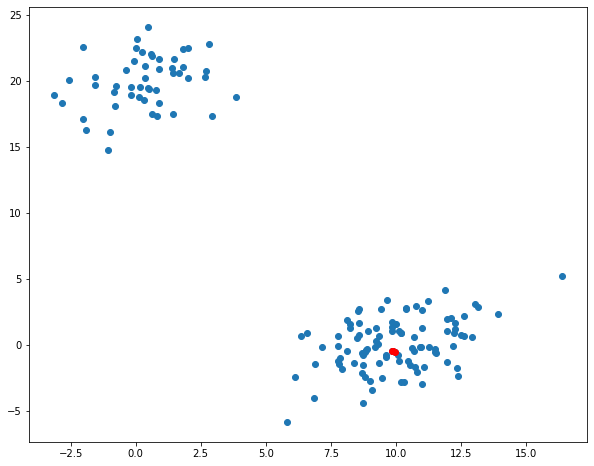

In [15]:
idx = [33, 62, 68]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1]) ## pintar todos los puntos
plt.scatter(X[idx, 0], X[idx,1], c='r') #destacamos en rojo los puntos interesantes
plt.show()

# Representación gráfica de un dendrograma

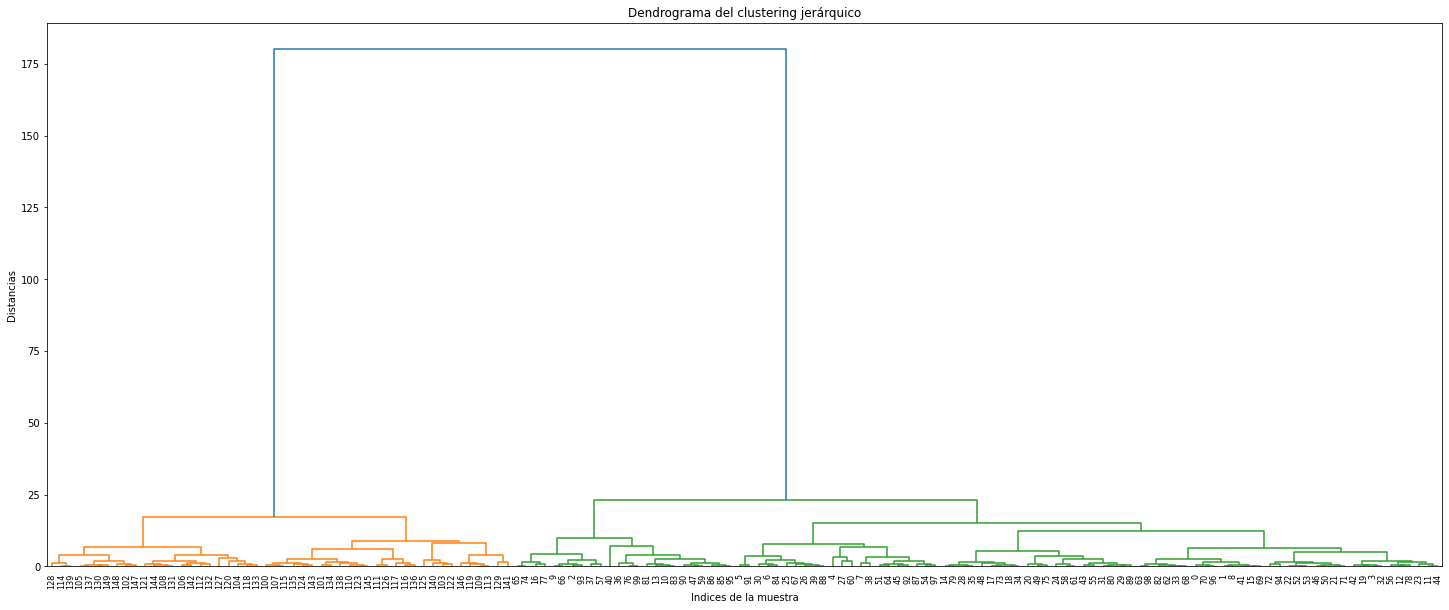

In [17]:
plt.figure(figsize=(25,10)) #tamaño del gráfico
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Indices de la muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0)
plt.show()

### Truncar el dendrograma

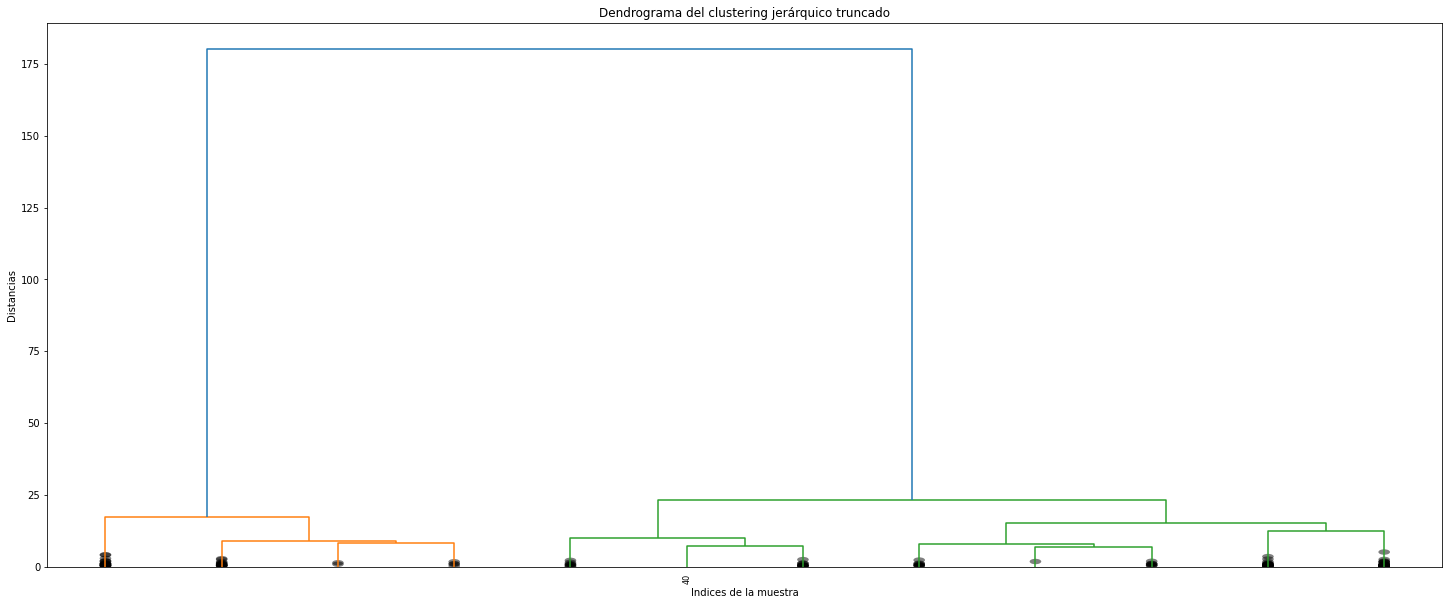

In [20]:
plt.figure(figsize=(25,10)) #tamaño del gráfico
plt.title("Dendrograma del clustering jerárquico truncado")
plt.xlabel("Indices de la muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0, color_threshold=0.7*180, truncate_mode = "lastp", p=12, show_leaf_counts = False, show_contracted=True)
plt.show()

### Dendrograma tuneado

In [33]:
def dendrogram_tune(*args, **kwargs):
    max_d=kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold']=max_d
    annotate_above = kwargs.pop ('annotate_above', 0)
    
    ddata = dendrogram(*args, **kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title("Clustering jerárquico con Dendrograma truncado")
        plt.xlabel("Indice del Dataset (o tamaño del cluster)")
        plt.ylabel("Distancia")
        for i, d, c in zip (ddata ['icoord'], ddata ['dcoord'], ddata['color_list']):
            x= 0.5* sum(i[1:3])
            y= d [1]
            if y>annotate_above:
                plt.plot(x,y,'0', c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),
                            textcoords = "offset points", va ="top", ha = "center")
    if max_d:
        plt.axhline(y=max_d, c='k')
    return ddata
            

ValueError: Unrecognized character 0 in format string

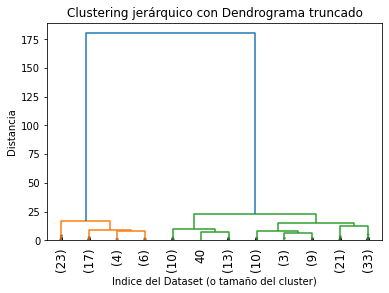

In [38]:
dendrogram_tune(Z,truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above=10, max_d=50 )
plt.show()